### Курсовая работа на тему: 
### "Линейная регрессия (условия применимости метода, построение модели, исследование модели на статистическую значимость, F-критерий Фишера, t-статистика Стьюдента, коэффициент детерминации)"

**Модель для исследования**

Выбранная модель представляет собой данные, которые предсказывают мощность солнечной энергетической системы, установленной в Беркли, Калифорния. Данные содержат в себе 16 колонок:
1. Day of Year - день года;
2. Year - год;
3. Month - месяц;
4. Day день;
5. First Hour of Period - первый час периода;
6. Is Daylight - это дневной свет?;
7. Distance to Solar Noon - расстояние до солнечного полудня;
8. Average Temperature (Day) - средняя дневная температура;
9. Average Wind Direction (Day) - среднее направление ветра за день;
10. Average Wind Speed (Day) - средняя скорость ветра за день;
11. Sky Cover - облачность;
12. Visibility - видимость;
13. Relative Humidity - относительная влажность;
14. Average Wind Speed (Period) - средняя скорость ветра за период;
15. Average Barometric Pressure (Period) - среднее барометрическое давление за период;
16. Power Generated - Выработанная энергия.



**Путь к файлу**

In [2]:
DATASET_PATH = 'BigML_Dataset.csv'

**Подключение библиотек**

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Загрузка данных**

In [4]:
df = pd.read_csv(DATASET_PATH)
df.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


**Форма массива**

In [5]:
df.shape

(2920, 16)

**Общая информация о массиве**

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
Day of Year                             2920 non-null int64
Year                                    2920 non-null int64
Month                                   2920 non-null int64
Day                                     2920 non-null int64
First Hour of Period                    2920 non-null int64
Is Daylight                             2920 non-null bool
Distance to Solar Noon                  2920 non-null float64
Average Temperature (Day)               2920 non-null int64
Average Wind Direction (Day)            2920 non-null int64
Average Wind Speed (Day)                2920 non-null float64
Sky Cover                               2920 non-null int64
Visibility                              2920 non-null float64
Relative Humidity                       2920 non-null int64
Average Wind Speed (Period)             2919 non-null float64
Average Barometric Pressure (Period)    2920 n

**Cтатистические характеристики по столбцам с числовыми значениями**

In [7]:
round(df.describe(), 3)

,Day of Year,Year,Month,Day,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2920.000,2920.000,2920.000,2920.000,2920.000,2920.000,2920.000,2920.000,2920.000,2920.000,2920.000,2920.000,2919.000,2920.000,2920.000
mean,183.334,2008.666,6.526,15.721,11.500,0.503,58.468,24.953,10.097,1.988,9.558,73.514,10.129,30.018,6979.846
std,105.770,0.472,3.448,8.798,6.875,0.298,6.841,6.915,4.838,1.412,1.384,15.077,7.262,0.142,10312.336
min,1.000,2008.000,1.000,1.000,1.000,0.050,42.000,1.000,1.100,0.000,0.000,14.000,0.000,29.480,0.000
25%,92.000,2008.000,4.000,8.000,6.250,0.244,53.000,25.000,6.600,1.000,10.000,65.000,5.000,29.920,0.000
50%,183.000,2009.000,7.000,16.000,11.500,0.479,59.000,27.000,10.000,2.000,10.000,77.000,9.000,30.000,404.000
75%,275.000,2009.000,10.000,23.000,16.750,0.740,63.000,29.000,13.100,3.000,10.000,84.000,15.000,30.110,12723.500
max,366.000,2009.000,12.000,31.000,22.000,1.141,78.000,36.000,26.600,4.000,10.000,100.000,40.000,30.530,36580.000


**Информация по столбцу Boolean**

In [8]:
df.describe(include=[bool])

,Is Daylight
count,2920
unique,2
top,True
freq,1805


**Преобразование Boolean в числовые данные**

In [9]:
df['Is Daylight'] = df['Is Daylight'].astype('int64')

In [10]:
df.head(20)

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,0,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,1,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,1,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,1,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,245,2008,9,1,16,1,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,245,2008,9,1,19,1,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515
7,245,2008,9,1,22,0,0.759640,69,28,7.5,0,10.0,49,6.0,29.86,0
8,246,2008,9,2,1,0,0.862113,72,29,6.8,0,10.0,67,6.0,29.86,0
9,246,2008,9,2,4,0,0.630155,72,29,6.8,0,10.0,49,0.0,29.87,0


**Количество пропущенных значений по каждому признаку**

In [11]:
len(df) - df.count()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

**Вычисление среднего арифметического, медианы, моды части характеристики Average Wind Speed (Period)**

In [12]:
mean_windspeed_p = df['Average Wind Speed (Period)'].mean()
median_windspeed_p = df['Average Wind Speed (Period)'].median()
mode_windspeed_p = df['Average Wind Speed (Period)'].mode()[0]
mean_windspeed_p, median_windspeed_p, mode_windspeed_p

(10.129153819801301, 9.0, 0.0)

**Замена пропущенного значения по признаку Average Wind Speed (Period) медианой**

In [13]:
df.loc[df['Average Wind Speed (Period)'].isnull(), 'Average Wind Speed (Period)'] = median_windspeed_p

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
Day of Year                             2920 non-null int64
Year                                    2920 non-null int64
Month                                   2920 non-null int64
Day                                     2920 non-null int64
First Hour of Period                    2920 non-null int64
Is Daylight                             2920 non-null int64
Distance to Solar Noon                  2920 non-null float64
Average Temperature (Day)               2920 non-null int64
Average Wind Direction (Day)            2920 non-null int64
Average Wind Speed (Day)                2920 non-null float64
Sky Cover                               2920 non-null int64
Visibility                              2920 non-null float64
Relative Humidity                       2920 non-null int64
Average Wind Speed (Period)             2920 non-null float64
Average Barometric Pressure (Period)    2920 

**Удаление строк, в которых исследуется время отсутствия дневного света. В этот период выработанная энергия равняется 0**

In [15]:
df = df.loc[df['Is Daylight'] != 0]
df.reset_index(inplace=True)
df.head(10)

,index,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,2,245,2008,9,1,7,1,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
1,3,245,2008,9,1,10,1,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
2,4,245,2008,9,1,13,1,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
3,5,245,2008,9,1,16,1,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
4,6,245,2008,9,1,19,1,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515
5,10,246,2008,9,2,7,1,0.398196,72,29,6.8,0,10.0,54,0.0,29.90,4939
6,11,246,2008,9,2,10,1,0.166237,72,29,6.8,0,10.0,64,0.0,29.92,24335
7,12,246,2008,9,2,13,1,0.065722,72,29,6.8,0,10.0,23,9.0,29.88,29025
8,13,246,2008,9,2,16,1,0.297680,72,29,6.8,0,10.0,30,18.0,29.84,15408
9,14,246,2008,9,2,19,1,0.529639,72,29,6.8,0,10.0,65,11.0,29.84,491


In [16]:
df.drop('index', axis=1, inplace=True)

In [17]:
df.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,7,1,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
1,245,2008,9,1,10,1,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
2,245,2008,9,1,13,1,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
3,245,2008,9,1,16,1,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
4,245,2008,9,1,19,1,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515


In [18]:
df.shape

(1805, 16)

**Проверка на условие применимости метода линейной регрессии**

**Тест на нормальность. Построение qq графика**

In [19]:
df_target = df['Power Generated']
df_target.head()

0     5418
1    25477
2    30069
3    16280
4      515
Name: Power Generated, dtype: int64

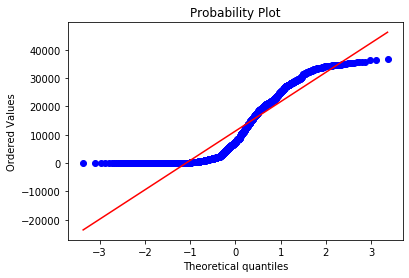

In [20]:
import pylab
import scipy.stats as stats
stats.probplot (df_target, dist = 'norm', plot = pylab)
pylab.show()

**Получение среднего арифметического, медианы и моды целевой переменной**

In [21]:
target_mean = round(df_target.mean(), 2)
target_median = df_target.median()
target_mode = df_target.mode()[0]
target_mean, target_median, target_mode  

(11291.5, 7462.0, 0)

**Распределение целевой переменной с нанесенными средним арифметическим, медианой и модой**

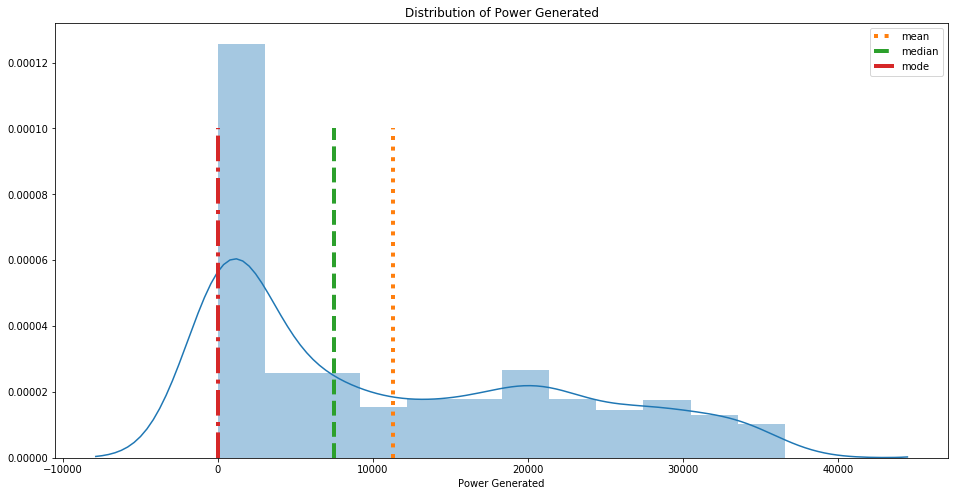

In [22]:
plt.figure(figsize = (16, 8))

sns.distplot(df_target)

y = np.linspace(0, 0.0001, 1000)

plt.plot([target_mean] * 1000, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 1000, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 1000, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Power Generated')
plt.legend()
plt.show()

**Вывод: целевая переменная имеет распределение, приближенное к нормальному.**

**Проверка на линейность связей**

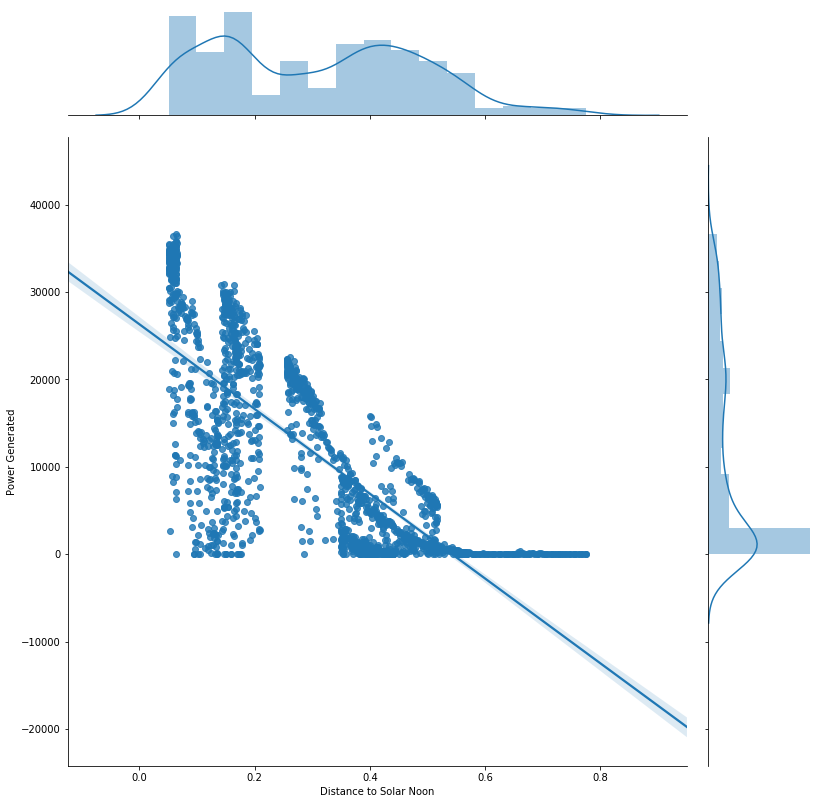

In [23]:
grid = sns.jointplot(df['Distance to Solar Noon'], df_target , kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Вывод: наблюдается некоторая линейная связь**

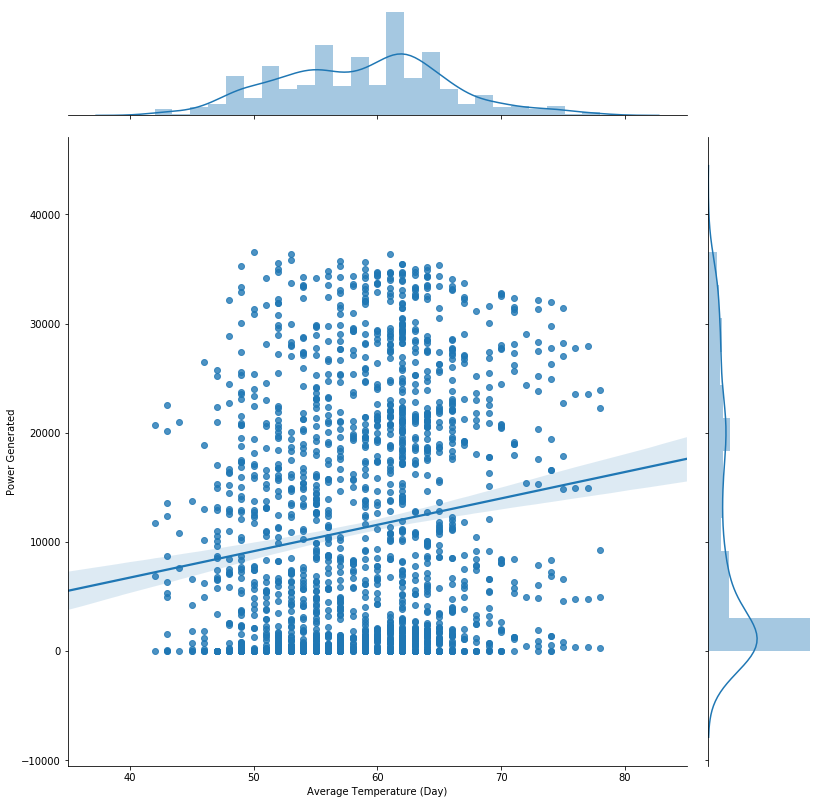

In [24]:
grid = sns.jointplot(df['Average Temperature (Day)'], df_target , kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Вывод: линейная связь не наблюдается**

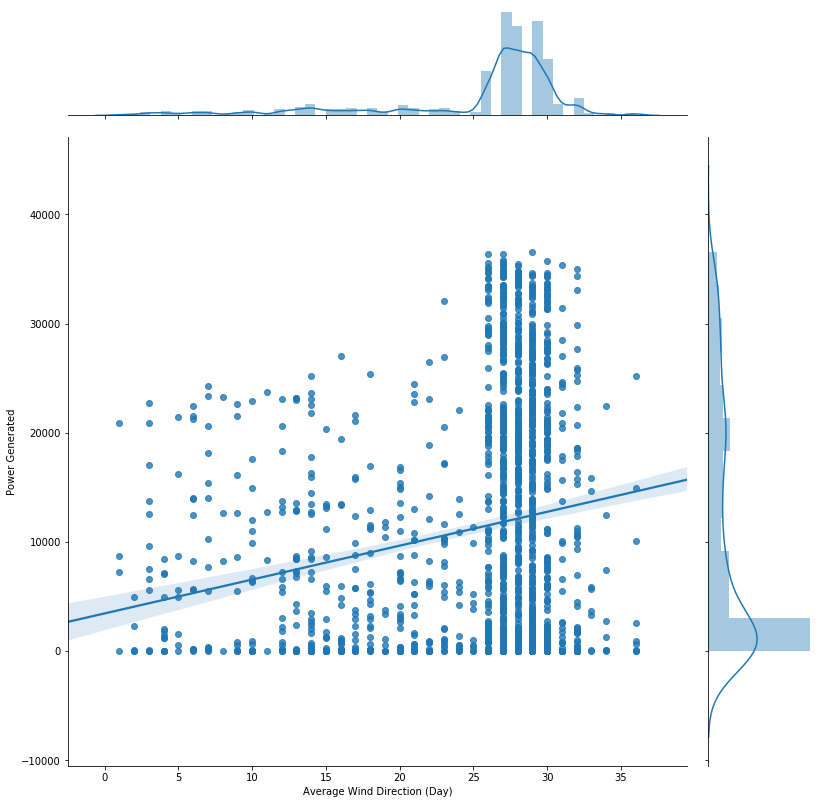

In [25]:
grid = sns.jointplot(df['Average Wind Direction (Day)'], df_target , kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Вывод: линейная связь не наблюдается**

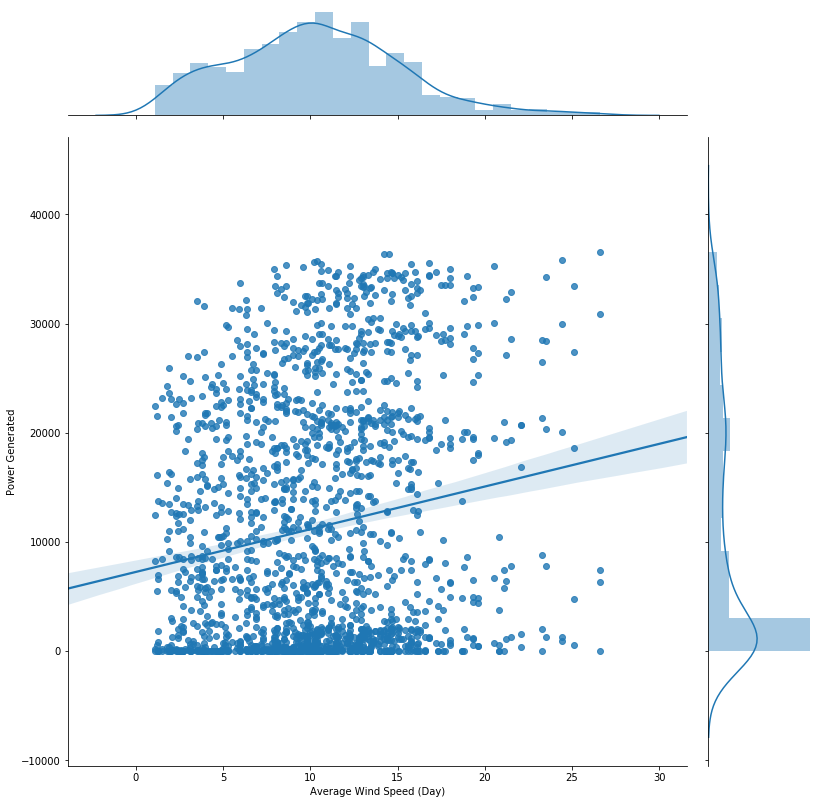

In [26]:
grid = sns.jointplot(df['Average Wind Speed (Day)'], df_target , kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Вывод: линейная связь не наблюдается**

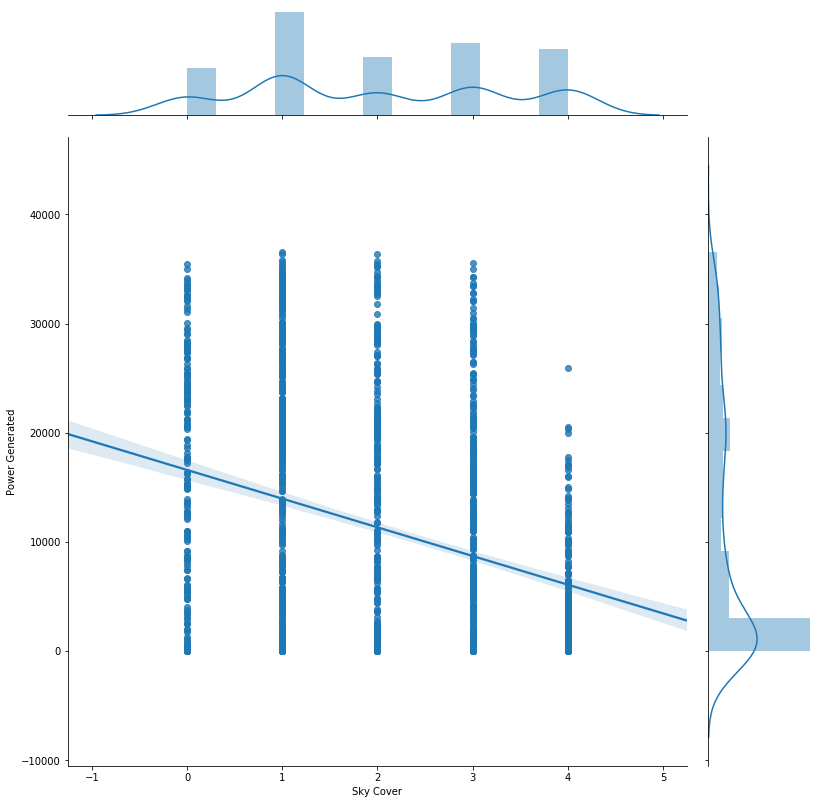

In [27]:
grid = sns.jointplot(df['Sky Cover'], df_target , kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Вывод: линейная связь не наблюдается**

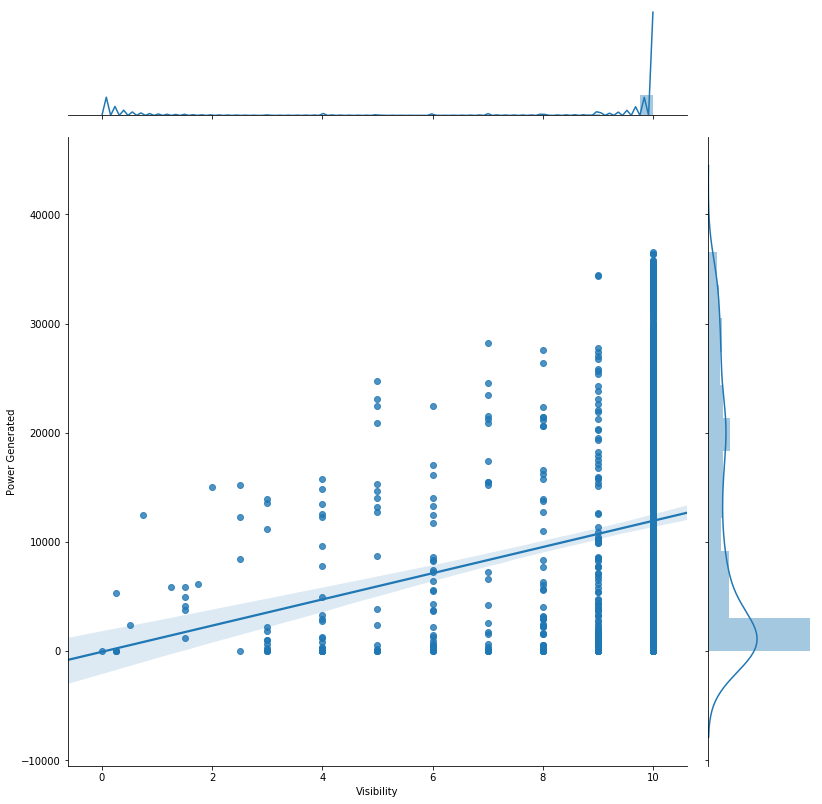

In [28]:
grid = sns.jointplot(df['Visibility'], df_target , kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Вывод: линейная связь не наблюдается**

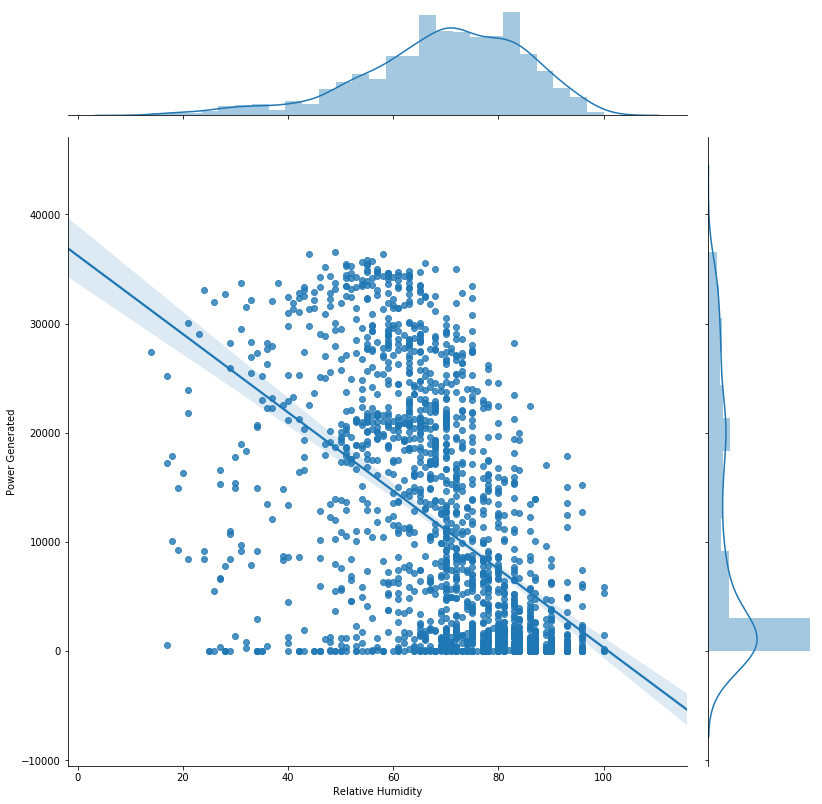

In [29]:
grid = sns.jointplot(df['Relative Humidity'], df_target , kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Вывод: линейная связь не наблюдается**

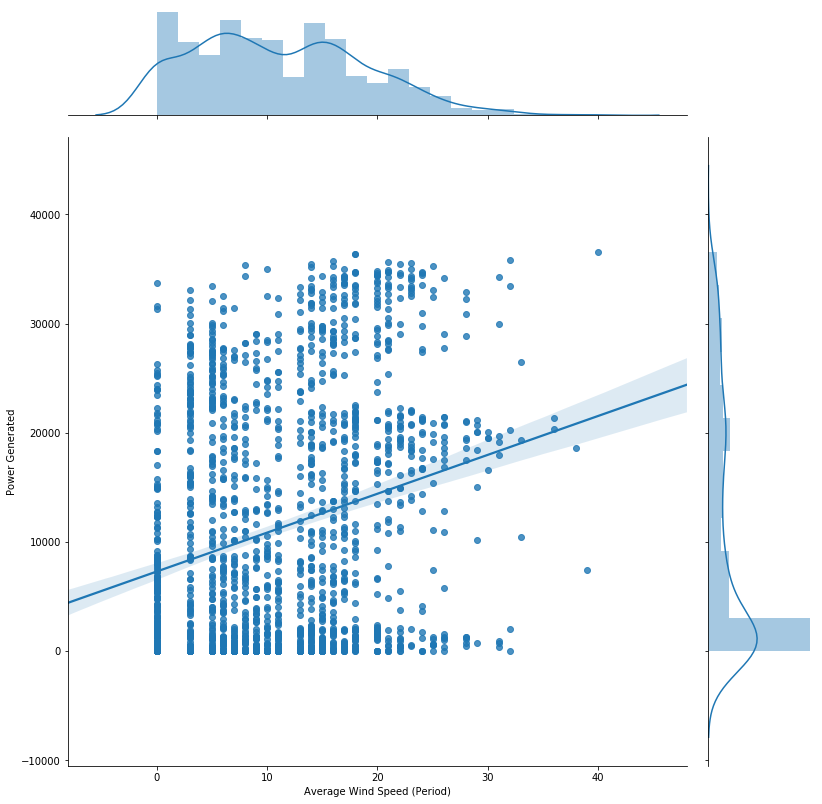

In [30]:
grid = sns.jointplot(df['Average Wind Speed (Period)'], df_target , kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Вывод: линейная связь не наблюдается**

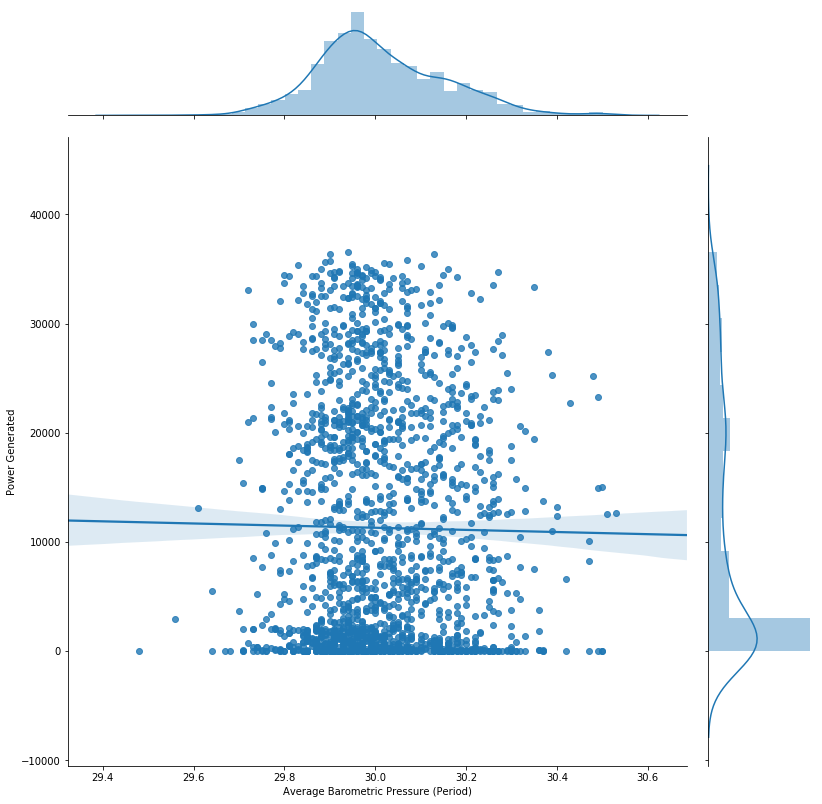

In [31]:
grid = sns.jointplot(df['Average Barometric Pressure (Period)'], df_target , kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Вывод: линейная связь не наблюдается**

**Применим матричный метод поиска коэффициентов**

In [32]:
feature_names = ['Distance to Solar Noon',
 'Average Temperature (Day)',
 'Average Wind Direction (Day)',
 'Average Wind Speed (Day)',
 'Sky Cover',
 'Visibility',
 'Relative Humidity',
 'Average Wind Speed (Period)',
 'Average Barometric Pressure (Period)']
target_name = ['Power Generated']

In [33]:
X = np.hstack([np.ones((1805, 1)), df[feature_names]])
X

array([[1.00000000e+00, 3.97172237e-01, 6.90000000e+01, ...,
        7.00000000e+01, 0.00000000e+00, 2.98900000e+01],
       [1.00000000e+00, 1.65809769e-01, 6.90000000e+01, ...,
        3.30000000e+01, 0.00000000e+00, 2.99100000e+01],
       [1.00000000e+00, 6.55526990e-02, 6.90000000e+01, ...,
        2.10000000e+01, 3.00000000e+00, 2.98900000e+01],
       ...,
       [1.00000000e+00, 6.40204870e-02, 6.30000000e+01, ...,
        6.60000000e+01, 1.50000000e+01, 2.99100000e+01],
       [1.00000000e+00, 2.94494238e-01, 6.30000000e+01, ...,
        6.80000000e+01, 2.10000000e+01, 2.98800000e+01],
       [1.00000000e+00, 5.24967990e-01, 6.30000000e+01, ...,
        8.10000000e+01, 1.70000000e+01, 2.98700000e+01]])

In [34]:
y = df['Power Generated']
y

0        5418
1       25477
2       30069
3       16280
4         515
        ...  
1800      464
1801     6995
1802    29490
1803    17257
1804      677
Name: Power Generated, Length: 1805, dtype: int64

In [35]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([ 2.29449870e+04, -4.35584205e+04, -3.89519682e+01,  1.00696636e+02,
        1.09485887e+02, -1.34814622e+03,  1.34407862e+02, -1.42418253e+02,
        1.29129874e+02,  3.44702351e+02])

In [36]:
y_hat = B[0] + B[1] * df['Distance to Solar Noon'] + B[2] * df['Average Temperature (Day)'] + B[3] * df['Average Wind Direction (Day)'] + B[4] * df['Average Wind Speed (Day)'] + B[5] * df['Sky Cover']+ B[6] * df['Visibility'] + B[7] * df['Relative Humidity'] + B[8] * df['Average Wind Speed (Period)'] + B[9] * df['Average Barometric Pressure (Period)']  
y_hat

0        8275.710048
1       23629.863129
2       30086.417354
3       22719.861325
4        9323.452569
            ...     
1800     2472.037003
1801    14359.599587
1802    24786.367860
1803    13878.750750
1804     1468.274338
Length: 1805, dtype: float64

In [37]:
y = df['Power Generated']
y

0        5418
1       25477
2       30069
3       16280
4         515
        ...  
1800      464
1801     6995
1802    29490
1803    17257
1804      677
Name: Power Generated, Length: 1805, dtype: int64

**Проверим модель на однородность дисперсий. Построим график остатков.**

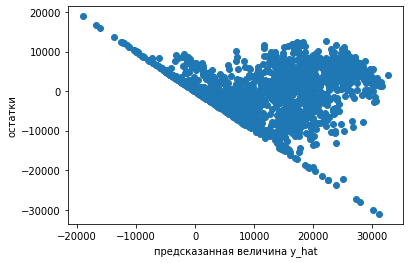

In [38]:
plt.scatter(y_hat, y - y_hat)
plt.ylabel('остатки')
plt.xlabel('предсказанная величина y_hat')

plt.show()

**Вывод: однородность дисперсии слабо выражена, так как все значения располагаются выше условной линии.**

**Найдем средную квадратичную ошибку**

In [39]:
def mse(y_hat=y_hat, y=y, n=1805):
    return np.sum((y_hat - y)**2) / n

In [40]:
mse(y_hat, y)

33236201.635619998

**Найдем коэффициент детерминации для оценки качества модели**

In [41]:
from sklearn.metrics import r2_score as r2
round(r2(y.values.flatten(), y_hat.values.flatten()), 3)

0.73

**Вывод: коэффициент детерминации показал, какую часть изменчивости y описала модель. 73 %. Качество модели оставляет желать лучшего.**

**Оценка значимости модели с помощью F-критерия Фишера**

In [42]:
#устанавливаем уровень значимости 
alpha = 0.05
#число измерений
n = 1805
#число параметров
p = 10

In [43]:
#находим число степеней свободы
df1 = p - 1
df2 = n - p
df1, df2

(9, 1795)

In [44]:
#находим объясненную сумму квадратных отклонений
ssf = np.sum((y_hat - target_mean)**2)
ssf

162551222989.02356

In [45]:
#находим остаточную сумму квадратных отклонений
sso = np.sum((y_hat - y)**2)
sso

59991343952.2941

In [46]:
#рассчитываем сумму квадратных отклонений в расчете на одну степень свободы
msf = ssf/df1
msf

18061246998.780396

In [47]:
mso = sso/df2
mso

33421361.533311475

In [48]:
#рассчитываем критерий Фишера F
Fp = msf/mso
Fp

540.4102696647632

In [49]:
#находим табличное значение критерия Фишера F
Ft = 1.88

**Вывод:Fp > Ft. Модель считается значимой на уровне значимости 0.05.**

**t-статистика Стьюдента. Проверка значимости отдельных параметров модели**

In [50]:
#рассмотрим признак 'Distance to Solar Noon'
#находим степень свободы
#устанавливаем уровень значимости 
alpha = 0.05
#число измерений
n = 1805
#число переменных
m = 9
dof = n-m-1

Sost = np.sqrt(np.sum(y_hat - y)**2 / dof)
Sost

9.300110092472691e-06

In [51]:
Sb1 = Sost * np.sqrt(np.sum(df['Distance to Solar Noon']**2)) / (n * np.std(df['Distance to Solar Noon']))
Sb1

4.4049222752995207e-07

In [52]:
tb1 = B[1] / Sb1
tb1

-98885786776.3805

In [184]:
#находим табличное значение критерия Стьюдента
#dof = 1805 - 9 - 1 = 1795, alpha = 0.05  
#St < 1.9759

**Вывод: |Sb1| > St. Параметр при признакe 'Distance to Solar Noon' считается значимым на уровне значимости 0.05.**